Visualización de la serie temporal

In [3]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\23.- Time Series Forecasting\Ejercicios\Datos\acea-water-prediction\Aquifer_Petrignano.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [26]:
df2 = df[["Date","Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]]
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
time,,,
2006-03-14,14/03/2006,-22.48,-22.18
2006-03-15,15/03/2006,-22.38,-22.14
2006-03-16,16/03/2006,-22.25,-22.04
2006-03-17,17/03/2006,-22.38,-22.04
2006-03-18,18/03/2006,-22.60,-22.04
...,...,...,...
2020-06-26,26/06/2020,-25.68,-25.07
2020-06-27,27/06/2020,-25.80,-25.11
2020-06-28,28/06/2020,-25.80,-25.19


In [27]:
df2.dtypes

Date                         object
Depth_to_Groundwater_P24    float64
Depth_to_Groundwater_P25    float64
dtype: object

In [28]:
df2['time'] = pd.to_datetime(df['Date'])

C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_10264\1025793469.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['time'] = pd.to_datetime(df['Date'])
C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_10264\1025793469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time'] = pd.to_datetime(df['Date'])


In [29]:
df2.set_index('time', inplace=True)

# visualizar
elementos importantes como la tendencia y la estacionariad son importantes para modelar las series financieras, así que es importante poder visualizar.

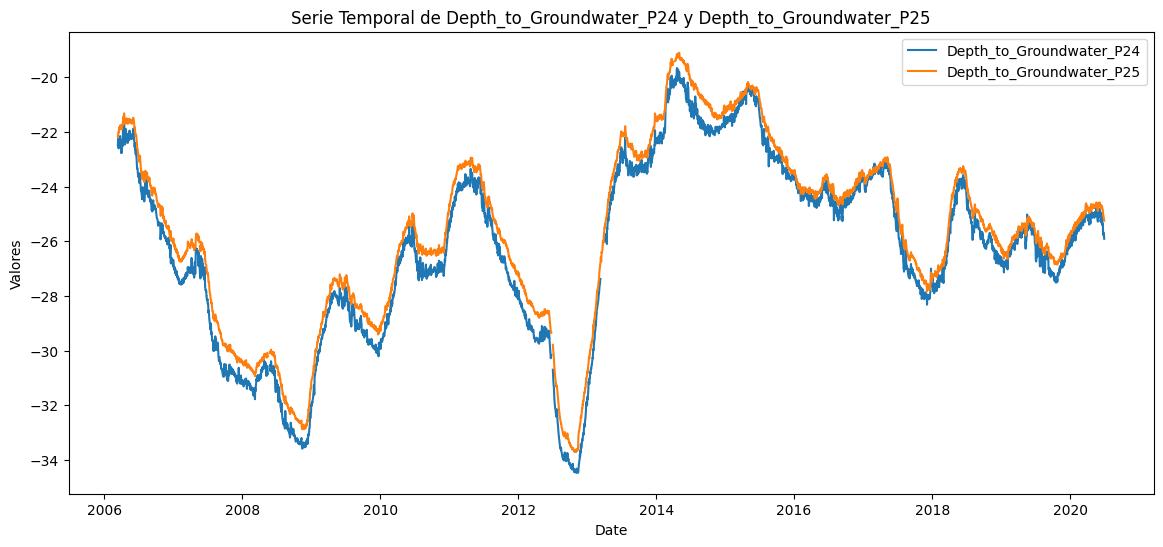

In [30]:
plt.figure(figsize=(14,6))
plt.plot(df2['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24')
plt.plot(df2['Depth_to_Groundwater_P25'], label='Depth_to_Groundwater_P25')
plt.title('Serie Temporal de Depth_to_Groundwater_P24 y Depth_to_Groundwater_P25')
plt.xlabel('Date')
plt.ylabel('Valores')
plt.legend()
plt.show()

Verificar estacionariedad

In [31]:
df2 = df2.fillna(0)

In [36]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2['Depth_to_Groundwater_P24'])
print('ADF Statistic:', result[0])
print('La serie es estacionaria' if result[1] < 0.05 else 'La serie no es estacionaria')


ADF Statistic: -5.908981884338978
La serie es estacionaria


Descomposición de la serie temporal

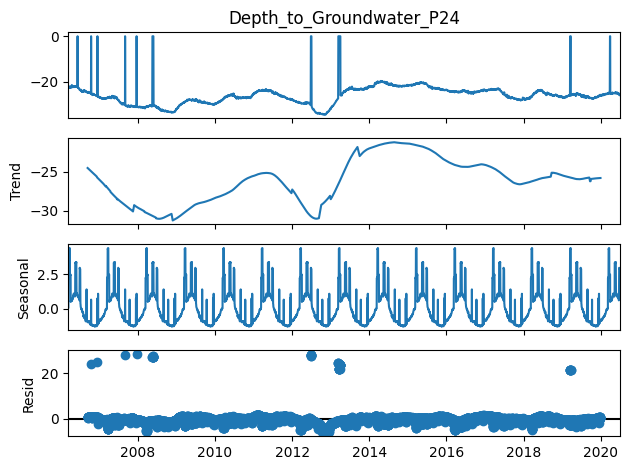

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df2['Depth_to_Groundwater_P24'], model='additive', period=365)
decomposition.plot()
plt.show()

Modelo predictivo ARIMA

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Ajuste ARIMA(p,d,q)
model = ARIMA(df2['Depth_to_Groundwater_P24'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Angel Resendiz Plata\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Angel Resendiz Plata\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Angel Resendiz Plata\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                   
Dep. Variable:     Depth_to_Groundwater_P24   No. Observations:                 5223
Model:                       ARIMA(5, 1, 0)   Log Likelihood              -10039.429
Date:                      Thu, 21 Aug 2025   AIC                          20090.858
Time:                              22:13:58   BIC                          20130.222
Sample:                          03-14-2006   HQIC                         20104.625
                               - 06-30-2020                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2629      0.002   -132.423      0.000      -0.267      -0.259
ar.L2         -0.0730      0.007     -9.844      0.000      -0.088      -0.058
ar.L

In [ ]:
Predicción con distintos horizontes

In [47]:
# Predicción a 7 días (1 semana)
pred_week = model_fit.forecast(steps=7)

# Predicción a 30 días (1 mes)
pred_month = model_fit.forecast(steps=30)

# Predicción a 365 días (1 año)
pred_year = model_fit.forecast(steps=365)

# Crear dataframe comparativo
df_week = pd.DataFrame({'1_week': pred_week})
df_month = pd.DataFrame({'1_month': pred_month})
df_year = pd.DataFrame({'1_year': pred_year})

df_forecast = pd.concat([df_week, df_month.head(len(df_week)), df_year.head(len(df_week))], axis=1)

In [48]:
df_forecast

,1_week,1_month,1_year
2020-07-01,-25.872558,-25.872558,-25.872558
2020-07-02,-25.870624,-25.870624,-25.870624
2020-07-03,-25.871090,-25.871090,-25.871090
2020-07-04,-25.865764,-25.865764,-25.865764
2020-07-05,-25.866067,-25.866067,-25.866067
2020-07-06,-25.867363,-25.867363,-25.867363
2020-07-07,-25.867179,-25.867179,-25.867179
